STS [SEMANTIC TEXTUAL SIMILARITY]

PROBLEM STATEMENT  

Dataset (attached with the task): The data contains a pair of paragraphs. These text paragraphs are 
randomly sampled from a raw dataset. Each pair of sentences may or may not be semantically similar. 
The candidate is to predict a value between 0-1 indicating the similarity between the pair of text paras. 
A sample of a similar dataset will be used as test data, therefore it’s crucial to the model solution using 
provided dataset. 

Part A  

Build an algorithm/model that can quantify the degree of similarity between the two text-based on 
Semantic similarity. Semantic Textual Similarity (STS) assesses the degree to which two sentences are 
semantically equivalent to each other. 

1 means highly similar  

0 means highly dissimilar 

Part B  

Deploy the Algorithm/Model built-in Part A in any cloud service provider. Your final algorithm should be 
exposed as a Server API Endpoint. In order to test this API make sure you hit a request to the server to 
get the result as a response to the API. The request-response body should be in the following format:  

Request body: {“text1”: ”nuclear body seeks new tech .......”, ”text2”: ”terror suspects face arrest ......”} 

Response body: {“similarity score”: 0.2 } 

Note: “text1”, “text2”, and “similarity score” keys should be kept as it is, without any change.

Approach

This is a problem of Natural Language Processing (NLP) and before building any deep learning model in NLP, text embedding plays a major role. The Text embedding converts text (sentences in our case) into numerical vectors.

After converting the sentences into vectors we can calculate how close these vectors are based on euclidean distance/ cosine similarity or any other method. and that itself can tell how similar our sentences are. In our case, we have used cosine similarity.

But, how to convert keywords into vectors? we are not converting just based on keyword but the context and meaning.

we have used Universal Sentence Encoder(USE). It encodes text into higher dimensional vectors that can be used for our semantic similarity task. The pre-trained Universal Sentence Encoder(USE) is publicly available in tensorflow hub.

Importing required libraries:

import the required libraries and Load the Universal Sentence Encoder's TF Hub module

In [62]:
import tensorflow as tf       # To work with USE4
import pandas as pd           # To work with tables 
import tensorflow_hub as hub  # contains USE4

from numpy import dot         # to calculate the dot product of two vectors
from numpy.linalg import norm #for finding the norm of a vector
import numpy as np

In [63]:
module_url = "https://www.kaggle.com/models/google/universal-sentence-encoder/TensorFlow2/universal-sentence-encoder/2"
model = hub.load(module_url)
def embed(input):
  return model(input)

Reading Data

In [64]:
Data = pd.read_csv(r"C:\Users\dshem\OneDrive\Desktop\STS\STS-1\sts_data.csv")
Data.head()

,text1,text2
0,broadband challenges tv viewing the number of ...,gardener wins double in glasgow britain s jaso...
1,rap boss arrested over drug find rap mogul mar...,amnesty chief laments war failure the lack of ...
2,player burn-out worries robinson england coach...,hanks greeted at wintry premiere hollywood sta...
3,hearts of oak 3-2 cotonsport hearts of oak set...,redford s vision of sundance despite sporting ...
4,sir paul rocks super bowl crowds sir paul mcca...,mauresmo opens with victory in la amelie maure...


In [65]:
Data.shape 

(3000, 2)

In [66]:
Data['text1'][0]

'broadband challenges tv viewing the number of europeans with broadband has exploded over the past 12 months  with the web eating into tv viewing habits  research suggests.  just over 54 million people are hooked up to the net via broadband  up from 34 million a year ago  according to market analysts nielsen/netratings. the total number of people online in europe has broken the 100 million mark. the popularity of the net has meant that many are turning away from tv  say analysts jupiter research. it found that a quarter of web users said they spent less time watching tv in favour of the net  the report by nielsen/netratings found that the number of people with fast internet access had risen by 60% over the past year.  the biggest jump was in italy  where it rose by 120%. britain was close behind  with broadband users almost doubling in a year. the growth has been fuelled by lower prices and a wider choice of always-on  fast-net subscription plans.  twelve months ago high speed internet

In [80]:
Data['text2'][0]

'gardener wins double in glasgow britain s jason gardener enjoyed a double 60m success in glasgow in his first competitive outing since he won 100m relay gold at the athens olympics.  gardener cruised home ahead of scot nick smith to win the invitational race at the norwich union international. he then recovered from a poor start in the second race to beat swede daniel persson and italy s luca verdecchia. his times of 6.61 and 6.62 seconds were well short of american maurice greene s 60m world record of 6.39secs from 1998.  it s a very hard record to break  but i believe i ve trained very well   said the world indoor champion  who hopes to get closer to the mark this season.  it was important to come out and make sure i got maximum points. my last race was the olympic final and there was a lot of expectation.  this was just what i needed to sharpen up and get some race fitness. i m very excited about the next couple of months.   double olympic champion  marked her first appearance on h

In [67]:
type(Data['text1'][0]) # we can see that all the data is in string type

str

In [68]:
model

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x1cd6dce6950>

Encoding text to vectors:

We have used USE version 4. It is trained on the whole wikipedia data. Our Sentence have a sequence of words. we give this sentence to our model (USE4), it gives us a "dense numeric vector". Here, we passed sentence pair and got a vector pair.

In [69]:
message = [Data['text1'][0], Data['text2'][0]]
message_embeddings = embed(message)
message_embeddings

<tf.Tensor: shape=(2, 512), dtype=float32, numpy=
array([[-0.02720232,  0.00681642, -0.03939367, ..., -0.03903357,
        -0.05795865, -0.05810072],
       [-0.05569994, -0.0564485 , -0.056383  , ...,  0.04282599,
        -0.05645383, -0.05647698]], dtype=float32)>

In [70]:
type(message_embeddings)

tensorflow.python.framework.ops.EagerTensor

Here we can see that the type of the vector retured is tensorflow.python.framework.ops.EagerTensor so, we cannot directly use it to compute the cosine similarity. We need to convert it into a numpy array first.

In [71]:
type(message_embeddings[0])

tensorflow.python.framework.ops.EagerTensor

In [72]:
type(tf.make_ndarray(tf.make_tensor_proto(message_embeddings)))

numpy.ndarray

In [73]:
a_np = tf.make_ndarray(tf.make_tensor_proto(message_embeddings))

Finding Cosine similarity

a for loop for all the sentence pair present in our data and found the vector representation of our sentences. For each vector pair, we found the cosine between the by using usual cosine formula. i.e.

cosin = dot(a,b)/norm(a)*norm(b)

we get the value ranging from -1 to 1. But, we need values ranging from 0 to 1 hence we will add 1 to the cosine similarity value and then normalizze it.

In [59]:
ans = []                                                        # This list will contain the cosin similarity value for each vector pair present.
for i in range(len(Data)):
  messages = [Data['text1'][i], Data['text2'][i]]               #storing each sentence pair in messages
  message_embeddings = embed(messages)                          #converting the sentence pair to vector pair using the embed() function
  a = tf.make_ndarray(tf.make_tensor_proto(message_embeddings)) #storing the vector in the form of numpy array
  cos_sin = dot(a[0], a[1])/(norm(a[0])*norm(a[1]))             #Finding the cosine between the two vectors
  ans.append(cos_sin)                                           #Appending the values into the ans list

In [60]:
len(ans) 

3000

In [61]:
Ans = pd.DataFrame(ans, columns = ['similarity score'])        #converting the ans list into Dataframe so that we can add it to our "Data"
     

In [74]:
Data = Data.join(Ans)
Data.head()

,text1,text2,similarity score
0,broadband challenges tv viewing the number of ...,gardener wins double in glasgow britain s jaso...,0.272668
1,rap boss arrested over drug find rap mogul mar...,amnesty chief laments war failure the lack of ...,0.277622
2,player burn-out worries robinson england coach...,hanks greeted at wintry premiere hollywood sta...,0.169011
3,hearts of oak 3-2 cotonsport hearts of oak set...,redford s vision of sundance despite sporting ...,0.157467
4,sir paul rocks super bowl crowds sir paul mcca...,mauresmo opens with victory in la amelie maure...,0.246201


In [77]:
Data['similarity score'] = Data['similarity score'].apply(lambda x: round(x, 1))
Data[['similarity score']]

,similarity score
0,0.3
1,0.3
2,0.2
3,0.2
4,0.2
...,...
2995,0.3
2996,0.3
2997,0.2
2998,0.3


In [79]:
result=Data[['similarity score']].to_dict("records")
result

[{'similarity score': 0.3},
 {'similarity score': 0.3},
 {'similarity score': 0.2},
 {'similarity score': 0.2},
 {'similarity score': 0.2},
 {'similarity score': 0.2},
 {'similarity score': 0.3},
 {'similarity score': 0.3},
 {'similarity score': 0.3},
 {'similarity score': 0.2},
 {'similarity score': 0.2},
 {'similarity score': 0.1},
 {'similarity score': 0.3},
 {'similarity score': 0.2},
 {'similarity score': 0.3},
 {'similarity score': 0.1},
 {'similarity score': 0.4},
 {'similarity score': 0.4},
 {'similarity score': 0.3},
 {'similarity score': 0.3},
 {'similarity score': 0.2},
 {'similarity score': 0.1},
 {'similarity score': 0.1},
 {'similarity score': 0.2},
 {'similarity score': 0.3},
 {'similarity score': 0.2},
 {'similarity score': 0.2},
 {'similarity score': 0.3},
 {'similarity score': 0.3},
 {'similarity score': 0.2},
 {'similarity score': 0.3},
 {'similarity score': 0.2},
 {'similarity score': 0.4},
 {'similarity score': 0.2},
 {'similarity score': 0.3},
 {'similarity score'

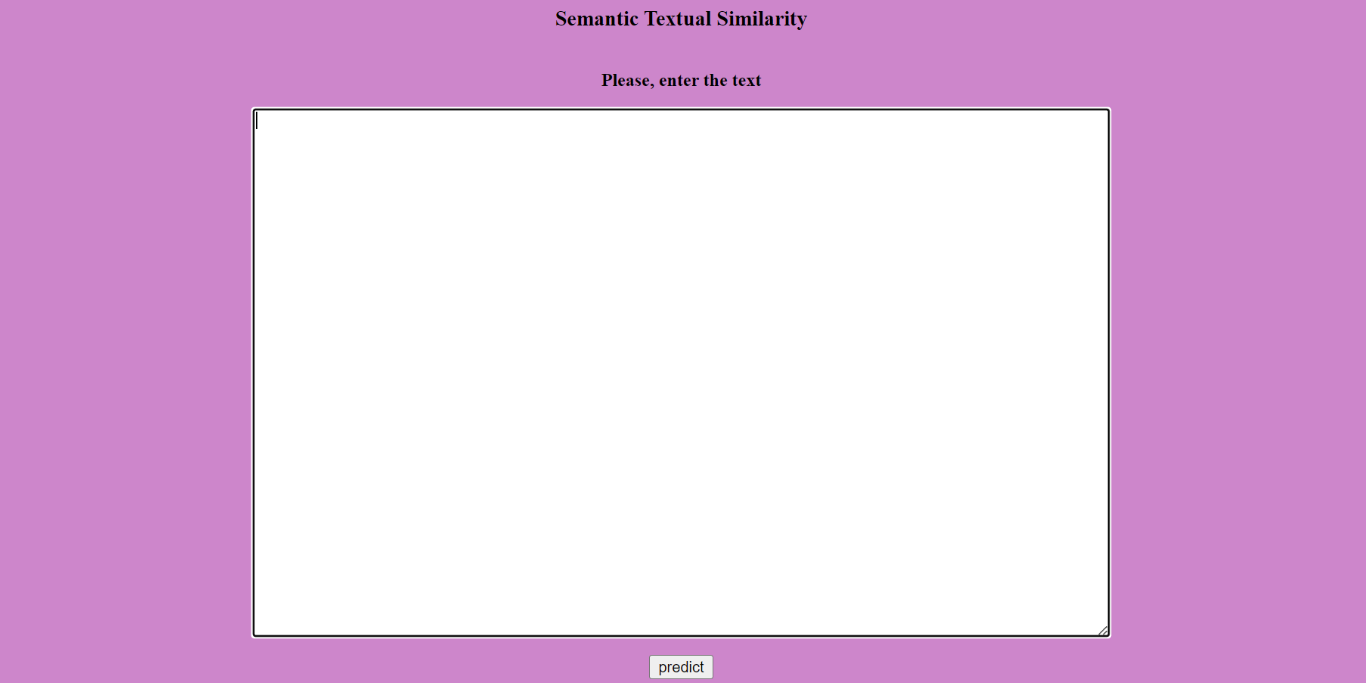

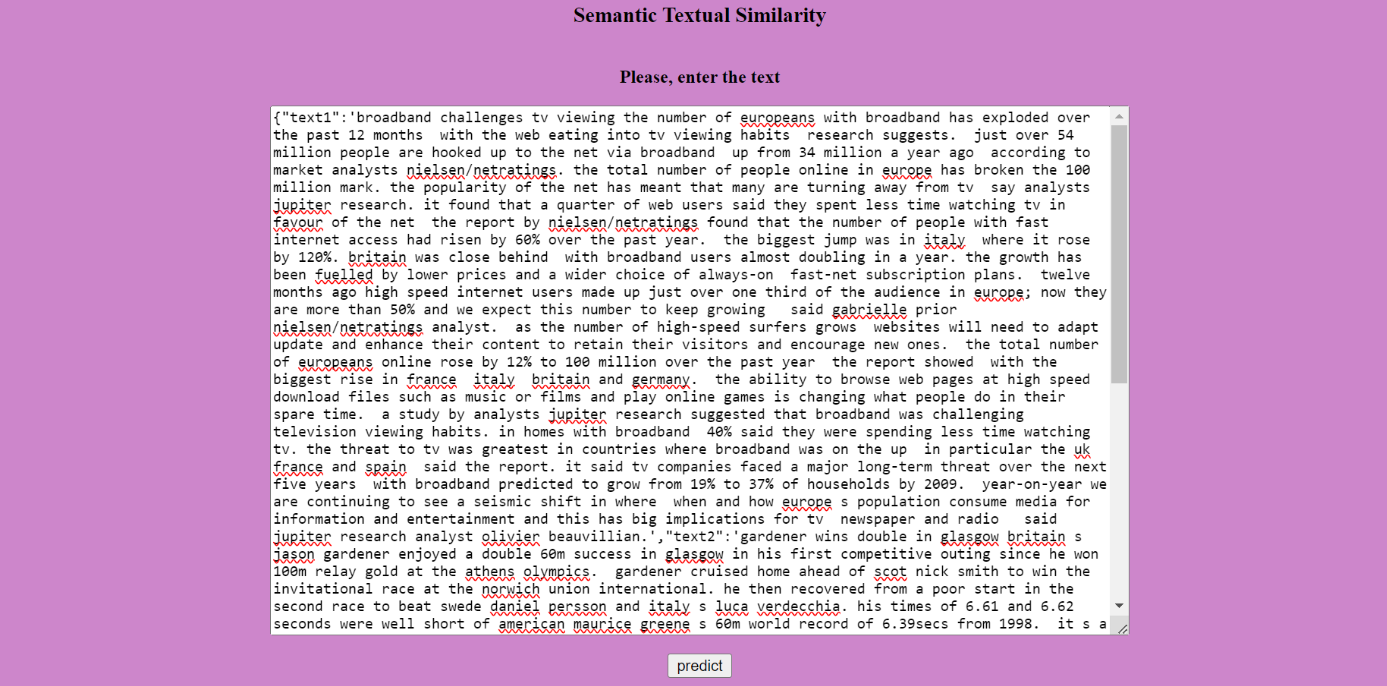

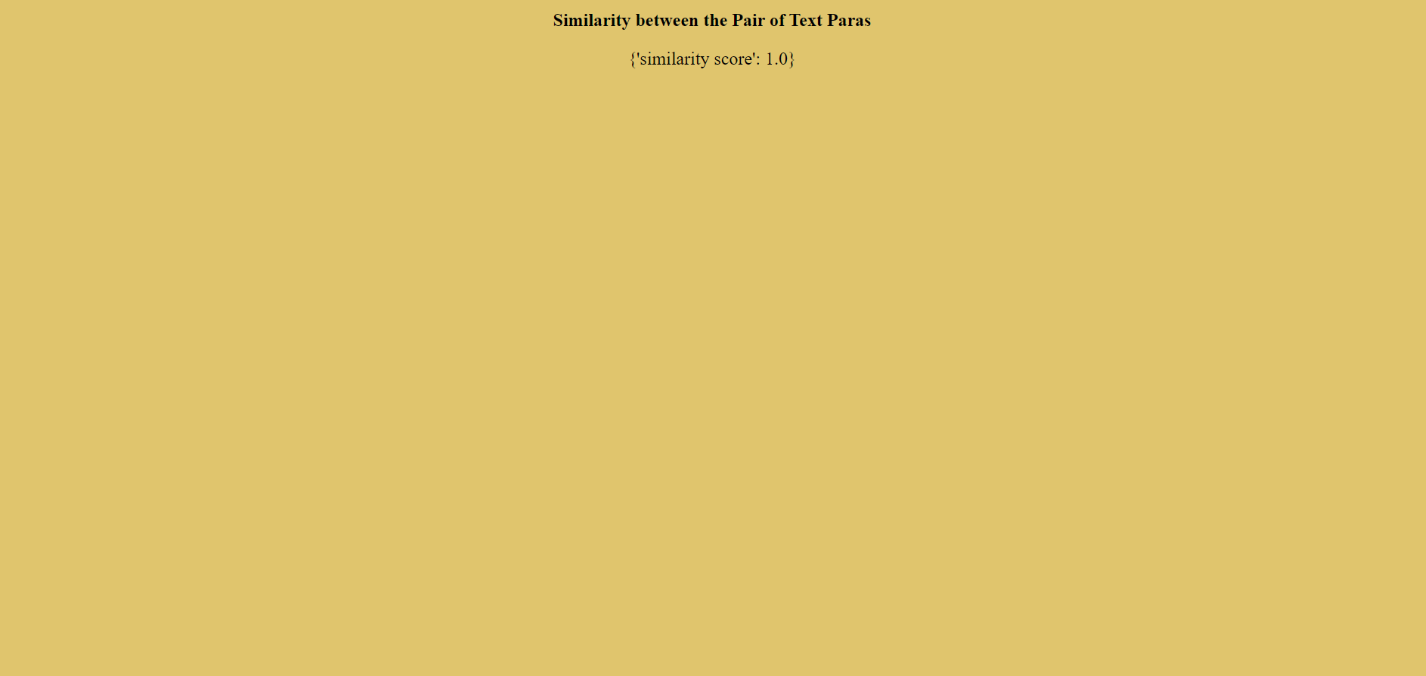